# Final Project

## 1. Scope the Project

Our plan is to use a supervised learning technique to predict which customers are most likely to cancel their subscription using **the past three months of customer data which includes subscription and listening history**.

## 2. Gather Data

Read the following files into Python:
* Customer data: *maven_music_customers.csv*
* Listing history: *maven_music_listening_history.xlsx*

In [3]:
# Read in the customer data
import pandas as pd
customer = pd.read_csv('../Data/maven_music_customers.csv')
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [5]:
# Read in the listening history
listening = pd.read_excel('../Data/maven_music_listening_history.xlsx')
listening.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [ ]:
# Hint: Where might you find listening history data beyond the ID's?
# Excel has 3 sheets

In [7]:
# Read in the audio data
audio = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=1)
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [9]:
# Read in the session data
session = pd.read_excel('../Data/maven_music_listening_history.xlsx',sheet_name=2)
session.head()

,Session ID,Session Log In Time
0,100520,2023-03-13 18:29:00
1,100522,2023-03-13 22:15:00
2,100525,2023-03-14 10:01:00
3,100527,2023-03-13 14:14:00
4,100538,2023-03-21 12:23:00


## 3. Clean Data

### a. Convert Data Types

Check the data types of the data in the tables and convert to numeric and datetime values as necessary.

In [11]:
# Check the data types, we need to fix them 
customer.dtypes

Customer ID           int64
Customer Name        object
Email                object
Member Since         object
Subscription Plan    object
Subscription Rate    object
Discount?            object
Cancellation Date    object
dtype: object

In [13]:
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,3/13/23,Basic (Ads),$2.99,NaN,NaN
1,5002,Aria Keys,Email: melodious.aria@email.edu,3/13/23,NaN,$2.99,NaN,NaN
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,3/13/23,NaN,$2.99,NaN,6/1/23
3,5267,Rock Bassett,Email: groovy.rock@email.com,3/20/23,Basic (Ads),$2.99,NaN,NaN
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,3/20/23,NaN,$2.99,NaN,NaN


In [15]:
customer.columns

Index(['Customer ID', 'Customer Name', 'Email', 'Member Since',
       'Subscription Plan', 'Subscription Rate', 'Discount?',
       'Cancellation Date'],
      dtype='object')

In [19]:
customer['Member Since']=pd.to_datetime(customer['Member Since'])
customer['Cancellation Date']=pd.to_datetime(customer['Cancellation Date'])
customer['Subscription Rate']=pd.to_numeric(customer['Subscription Rate'].str.replace('$',''))

C:\Users\dinht\AppData\Local\Temp\ipykernel_18528\156954543.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['Member Since']=pd.to_datetime(customer['Member Since'])
C:\Users\dinht\AppData\Local\Temp\ipykernel_18528\156954543.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  customer['Cancellation Date']=pd.to_datetime(customer['Cancellation Date'])


In [21]:
customer.dtypes
# look better now

Customer ID                   int64
Customer Name                object
Email                        object
Member Since         datetime64[ns]
Subscription Plan            object
Subscription Rate           float64
Discount?                    object
Cancellation Date    datetime64[ns]
dtype: object

In [23]:
listening.dtypes

Customer ID     int64
Session ID      int64
Audio Order     int64
Audio ID        int64
Audio Type     object
dtype: object

In [25]:
audio.dtypes

ID            object
Name          object
Genre         object
Popularity     int64
dtype: object

In [27]:
session.dtypes

Session ID                      int64
Session Log In Time    datetime64[ns]
dtype: object

In [ ]:
# listening, audio and session look good!

### b. Resolve Data Issues

Check for missing data, inconsistent text and typos, duplicate data and outliers.

#### i. Missing Data

In [29]:
# Look for NaN values in the data
# we can see Subscription Plan, Discount? and Cancellation Date contain Nan values
customer.isna().sum()

Customer ID           0
Customer Name         0
Email                 0
Member Since          0
Subscription Plan     5
Subscription Rate     0
Discount?            23
Cancellation Date    17
dtype: int64

In [31]:
# check rows contain Nan values
customer[customer.isna().any(axis=1)]

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,NaN,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,NaN,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,NaN,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,NaN,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,NaN,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,NaN,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,NaN,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,NaN,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,NaN,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,NaN,NaT


In [35]:
# we Check discount first, So we understand only Yes and No, Nan will tranform to No
customer['Discount?'].value_counts()

Discount?
Yes    7
Name: count, dtype: int64

In [39]:
customer['Discount?'] = customer['Discount?'].fillna('No')
customer['Discount?'].value_counts()

Discount?
No     23
Yes     7
Name: count, dtype: int64

In [41]:
# we tranform to numeric value 1,0. Later it will be easy for modeling
import numpy as np
customer['Discount?'] = np.where(customer['Discount?']=='Yes',1,0)

In [43]:
customer['Discount?'].dtype

dtype('int32')

In [45]:
# Continue to other Nan values from columns, we check Subscription Plan, we can see we have 2 values
customer['Subscription Plan'].value_counts()

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
Name: count, dtype: int64

In [47]:
# check Subscription Plan with Subscription Rate, we can see Basic(Ads) is 2.99
customer[['Subscription Plan','Subscription Rate']].value_counts()

Subscription Plan  Subscription Rate
Basic (Ads)        2.99                 12
Premium (No Ads)   7.99                  7
                   9.99                  5
                   99.99                 1
Name: count, dtype: int64

In [49]:
customer[customer.isna().any(axis=1)]
# we can see our Nan values from Subscription Plan have Subscription Rate = 2.99, we can fill Nan values = Basic (Ads).

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,NaN,2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,NaN,2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,NaN,2.99,0,NaT
5,5404,Jazz Saxton,Email: jazzy.sax@email.com,2023-03-20,NaN,2.99,0,2023-06-03
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
9,5763,Jazz Coleman,Email: coleman.jazzmaster@email.com,2023-03-28,Basic (Ads),2.99,0,NaT
10,5826,Chord Hayes,Email: harmonic.chord@email.com,2023-03-28,Basic (Ads),2.99,0,NaT


In [53]:
# I do wrong stuff, I will use np to tranform them.ZZZ
customer['Subscription Plan'] = customer['Subscription Plan'].fillna(2.99)
customer['Subscription Plan'].value_counts()

Subscription Plan
Premium (No Ads)    13
Basic (Ads)         12
2.99                 5
Name: count, dtype: int64

In [57]:
customer['Subscription Plan'] = np.where(customer['Subscription Plan']==2.99,'Basic (Ads)',customer['Subscription Plan'])

In [59]:
customer['Subscription Plan'].value_counts()

Subscription Plan
Basic (Ads)         17
Premium (No Ads)    13
Name: count, dtype: int64

In [63]:
customer['Subscription Plan'].isna().sum()
# look very good now

0

In [ ]:
# Last Nan values from Cancellation Date, we can understand customer still use our app so leave it

In [65]:
listening.isna().sum()

Customer ID    0
Session ID     0
Audio Order    0
Audio ID       0
Audio Type     0
dtype: int64

In [67]:
audio.isna().sum()

ID            0
Name          0
Genre         0
Popularity    0
dtype: int64

In [69]:
session.isna().sum()

Session ID             0
Session Log In Time    0
dtype: int64

In [ ]:
# The other datasets look good!!!

#### ii. Inconsistent Text & Typos

In [71]:
# Look for inconsistent text & typos
customer.describe()
# we can see max from Subscription Rate is 99.99 !!

,Customer ID,Member Since,Subscription Rate,Discount?,Cancellation Date
count,30.000000,30,30.000000,30.000000,13
mean,6276.333333,2023-04-10 06:24:00,8.556667,0.233333,2023-06-01 16:36:55.384615424
min,5001.000000,2023-03-13 00:00:00,2.990000,0.000000,2023-06-01 00:00:00
25%,5759.500000,2023-03-23 12:00:00,2.990000,0.000000,2023-06-01 00:00:00
50%,6196.000000,2023-04-05 12:00:00,2.990000,0.000000,2023-06-02 00:00:00
75%,6823.500000,2023-05-01 00:00:00,7.990000,0.000000,2023-06-02 00:00:00
max,7583.000000,2023-05-16 00:00:00,99.990000,1.000000,2023-06-03 00:00:00
std,814.255587,NaN,17.517840,0.430183,NaN


In [73]:
customer[customer['Subscription Rate']>7.99]
# We can see max is 9.99 but one value is 99.99, we will change to 9.99

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
6,5581,Reed Sharp,Email: sharp.tunes@email.com,2023-03-21,Premium (No Ads),9.99,0,NaT
7,5759,Carol Kingbird,Email: songbird.carol@email.com,2023-03-22,Premium (No Ads),9.99,0,2023-06-02
8,5761,Sonata Nash,Email: musical.sonata@email.com,2023-03-28,Premium (No Ads),9.99,0,NaT
12,6029,Chord Campbell,Email: campbell.chordify@email.com,2023-03-29,Premium (No Ads),9.99,0,2023-06-02
14,6163,Melody Parks,Email: park.of.melodies@email.com,2023-04-05,Premium (No Ads),9.99,0,NaT
15,6229,Symphony Rhodes,Email: rhodes.symphony@email.com,2023-04-06,Premium (No Ads),99.99,0,2023-06-02


In [77]:
customer['Subscription Rate'] = np.where(customer['Subscription Rate']>9.99,9.99,customer['Subscription Rate'])

In [79]:
customer['Subscription Rate'].mean()
# look good now

5.556666666666668

In [81]:
listening.describe()
# Audio Order look alright

,Customer ID,Session ID,Audio Order,Audio ID
count,505.000000,505.000000,505.000000,505.000000
mean,6112.247525,105225.554455,4.138614,112.063366
std,832.861221,3625.879577,2.669008,24.670285
min,5001.000000,100520.000000,1.000000,101.000000
25%,5267.000000,101925.000000,2.000000,103.000000
50%,6029.000000,105116.000000,4.000000,105.000000
75%,6822.000000,109654.000000,6.000000,109.000000
max,7583.000000,111333.000000,15.000000,205.000000


In [83]:
session.describe()

,Session ID,Session Log In Time
count,90.000000,90
mean,105619.788889,2023-04-27 08:18:34.000000512
min,100520.000000,2023-03-13 14:14:00
25%,102149.000000,2023-04-05 21:21:30
50%,105390.500000,2023-05-03 20:03:00
75%,109658.250000,2023-05-18 22:17:30
max,111333.000000,2023-05-31 06:03:00
std,3616.208569,NaN


In [85]:
audio.describe()

,Popularity
count,17.000000
mean,21.058824
std,23.381271
min,1.000000
25%,4.000000
50%,10.000000
75%,28.000000
max,80.000000


In [ ]:
# alright, let's continue

#### iii. Duplicate Rows

In [87]:
customer.duplicated().sum()

0

In [89]:
listening.duplicated().sum()

0

In [91]:
audio.duplicated().sum()

0

In [93]:
session.duplicated().sum()

0

In [ ]:
# they both look good

#### iv. Outliers

In [ ]:
# Look for outliers
# We already checked from inconsistent text & typos, they look good!!

### c. Create New Columns

Create two new columns that will be useful for EDA and modeling:
* Cancelled: whether a customer cancelled or not
* Email: Remove the "Email:" from the email addresses

In [95]:
# Create a 'Cancelled' column
customer.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT


In [99]:
customer['Cancelled'] = np.where(customer['Cancellation Date'].notnull(),1,0)

In [101]:
customer.head()
# 1 is customer already cancelled, 0 is still use

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,Email: harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,Email: melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,Email: rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,Email: groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,Email: beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [105]:
# Create an updated 'Email' column without the Email: portion
customer.Email = customer.Email.str.replace('Email:','')

In [107]:
customer.head()
# They are looking good now!

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


## 4. EDA

Try to better understand the customers who cancelled:
* How long were they members before they cancelled?
* What percentage of customers who cancelled had a discount vs customers who didn't cancel?

In [109]:
# How long were customers members before they cancelled?
# We can see around 46 days
(customer['Cancellation Date']-customer['Member Since']).mean()

Timedelta('46 days 07:23:04.615384615')

In [113]:
# Cancellation rate for those who had a discount
discount_yes = customer[customer['Discount?']==1]
discount_yes.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
21,6822,Kiki Keys,kiki.keys.piano@email.com,2023-05-01,Premium (No Ads),7.99,1,NaT,0
22,6824,Greta Groove,groovy.greta@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
23,7087,Harmony Heart,heartfelt.harmony@email.com,2023-05-01,Premium (No Ads),7.99,1,2023-06-02,1
25,7224,Melody Fitzgerald,fitzgerald.melody@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1
26,7401,Reed Murphy,murphy.reed.music@email.com,2023-05-08,Premium (No Ads),7.99,1,2023-06-01,1


In [117]:
# customer who cancelled we put 1, 0 is still use. 
discount_yes.Cancelled.sum() / discount_yes.Cancelled.count()

0.8571428571428571

In [119]:
# Cancellation rate for those who did not have a discount
discount_no = customer[customer['Discount?']==0]
discount_no.head()

,Customer ID,Customer Name,Email,Member Since,Subscription Plan,Subscription Rate,Discount?,Cancellation Date,Cancelled
0,5001,Harmony Greene,harmonious.vibes@email.com,2023-03-13,Basic (Ads),2.99,0,NaT,0
1,5002,Aria Keys,melodious.aria@email.edu,2023-03-13,Basic (Ads),2.99,0,NaT,0
2,5004,Lyric Bell,rhythmical.lyric@email.com,2023-03-13,Basic (Ads),2.99,0,2023-06-01,1
3,5267,Rock Bassett,groovy.rock@email.com,2023-03-20,Basic (Ads),2.99,0,NaT,0
4,5338,Rhythm Dixon,beats.by.rhythm@email.edu,2023-03-20,Basic (Ads),2.99,0,NaT,0


In [121]:
# customer who cancelled we put 1, 0 is still use. 
discount_no.Cancelled.sum() / discount_no.Cancelled.count()

0.30434782608695654

In [133]:
# Visualize the cancellation rate for those with a discount vs those without a discount
# I put them to datafarme
discount_rate = pd.DataFrame([['Had Discount',0.8571428571428571],
              ['No Discount',0.30434782608695654]]
            ,columns=['customer type','rate'])
discount_rate

,customer type,rate
0,Had Discount,0.857143
1,No Discount,0.304348


<Axes: >

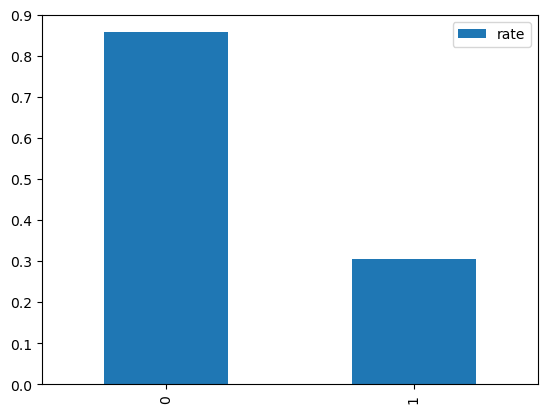

In [143]:
discount_rate.plot.bar()

Better understand the customers' listening histories:
* Join together the listening history and audio tables
* How many listening sessions did each customer have in the past 3 months?
* What were the most popular genres that customers listened to?

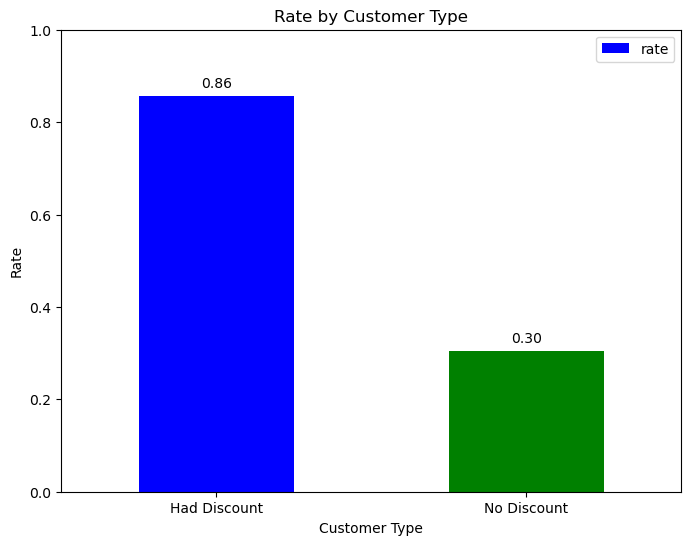

In [147]:
# I asked chat GPT to make my plot better. Don't be hesitate to ask AI and make your work easily!

import matplotlib.pyplot as plt
ax = discount_rate.plot.bar(x='customer type', y='rate', rot=0, color=['blue', 'green'], figsize=(8, 6))

# Adding labels and title
plt.xlabel('Customer Type')  # X-axis label
plt.ylabel('Rate')           # Y-axis label
plt.title('Rate by Customer Type')  # Title

# Set y-axis limits
plt.ylim(0, 1)  # Adjust if necessary depending on your actual data range

# Annotate bars with their numeric values
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

# Show plot
plt.show()

In [149]:
# Split the ID in the audio data so the column can be joined with other tables
listening.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type
0,5001,100520,1,101,Song
1,5001,100520,2,102,Song
2,5001,100520,3,103,Song
3,5001,100520,4,104,Song
4,5001,100520,5,105,Song


In [153]:
audio.head()

,ID,Name,Genre,Popularity
0,Song-101,Dance All Night,Pop,1
1,Song-102,Unbreakable Beat,Pop,2
2,Song-103,Sunset Boulevard,Pop Music,5
3,Song-104,Glowing Hearts,Pop Music,10
4,Song-105,Pop Rocks,Pop Music,52


In [163]:
# I don't want to split to merge 2 tables together, I will concat the ID in the audio data
listening['ID'] = listening['Audio Type'] + '-' + listening['Audio ID'].astype(str)

In [165]:
listening.head()
# Look pretty good

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID
0,5001,100520,1,101,Song,Song-101
1,5001,100520,2,102,Song,Song-102
2,5001,100520,3,103,Song,Song-103
3,5001,100520,4,104,Song,Song-104
4,5001,100520,5,105,Song,Song-105


In [167]:
# If you want to split ID from audio, we can do it to
audio.ID.str.split('-').to_list()

[['Song', '101'],
 ['Song', '102'],
 ['Song', '103'],
 ['Song', '104'],
 ['Song', '105'],
 ['Song', '106'],
 ['Song', '107'],
 ['Song', '108'],
 ['Song', '109'],
 ['Song', '110'],
 ['Song', '111'],
 ['Song', '112'],
 ['Podcast', '201'],
 ['Podcast', '202'],
 ['Podcast', '203'],
 ['Podcast', '204'],
 ['Podcast', '205']]

In [179]:
# add them to data frame and add columns, later concat to audio and we can merge two tables.
pd.DataFrame(audio.ID.str.split('-').to_list(),columns=['Audio Type','Audio ID'])

,Audio Type,Audio ID
0,Song,101
1,Song,102
2,Song,103
3,Song,104
4,Song,105
5,Song,106
6,Song,107
7,Song,108
8,Song,109
9,Song,110


In [183]:
df = pd.merge(listening,audio,how='inner',on='ID')

In [185]:
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52


In [189]:
# The number of listening sessions that each customer had in the past 3 months
df.groupby('Customer ID')['Session ID'].nunique()

Customer ID
5001    8
5002    4
5004    1
5267    7
5338    4
5404    1
5581    3
5759    2
5761    3
5763    6
5826    3
5827    1
6029    2
6092    3
6163    3
6229    2
6406    3
6584    2
6586    2
6588    3
6821    2
6822    3
6824    4
7087    3
7158    3
7224    4
7401    3
7579    2
7581    2
7583    1
Name: Session ID, dtype: int64

In [193]:
# The most popular genres that customers listened to
# definetely Pop Music
df.Genre.value_counts()

Genre
Pop Music     165
Pop            94
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

## 5. Prep for Modeling

Create a DataFrame that is ready for modeling with each row representing a customer and the following numeric, non-null columns:
* Customer ID
* Whether a customer cancelled or not
* Whether a customer received a discount or not
* The number of listening sessions
* Percent of listening history consisting of Pop
* Percent of listening history consisting of Podcasts

In [195]:
customer.columns

Index(['Customer ID', 'Customer Name', 'Email', 'Member Since',
       'Subscription Plan', 'Subscription Rate', 'Discount?',
       'Cancellation Date', 'Cancelled'],
      dtype='object')

In [197]:
# Create a dataframe ready for modeling
model_df = customer[['Customer ID','Discount?','Cancelled']]
model_df.head()

,Customer ID,Discount?,Cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1
3,5267,0,0
4,5338,0,0


In [199]:
# Calculate the number of listening sessions for each customer
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop Music,5
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop Music,10
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop Music,52


In [231]:
# I have to change Pop Music to Pop, they are same
df.Genre.value_counts()

Genre
Pop Music     165
Pop            94
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [235]:
df.Genre = np.where(df.Genre == 'Pop Music','Pop', df.Genre)b

In [237]:
df.Genre.value_counts()
# look good now

Genre
Pop           259
Hip Hop        88
Country        68
Jazz           48
Comedy         19
True Crime     15
Name: count, dtype: int64

In [239]:
# make a new data frame for number of sessions per customer, because later we will use it for calculate % of Genre
numbers = df.groupby('Customer ID')['Session ID'].count().to_frame().reset_index()
numbers.head()

,Customer ID,Session ID
0,5001,60
1,5002,22
2,5004,9
3,5267,45
4,5338,18


In [241]:
# Percent pop
genre = pd.get_dummies(df.Genre).astype(int)
genre.head()

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,0,0,1,0
4,0,0,0,0,1,0


In [243]:
# to calculate % of pop, I need to concat with customer_id, later I can calculate total songs
genre = pd.concat([df['Customer ID'],genre],axis=1)
genre.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001,0,0,0,0,1,0
1,5001,0,0,0,0,1,0
2,5001,0,0,0,0,1,0
3,5001,0,0,0,0,1,0
4,5001,0,0,0,0,1,0


In [245]:
percentage = genre.groupby('Customer ID').sum()
percentage.head()
# Alright, we have total of songs from each genre now!!

,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
Customer ID,,,,,,
5001,0,0,26,0,34,0
5002,0,22,0,0,0,0
5004,0,0,0,0,9,0
5267,0,0,22,0,23,0
5338,0,18,0,0,0,0


In [247]:
# I need to get total songs which we calculated above
# Concat does not work well, let try merge
pd.concat([numbers,percentage],axis=1)

,Customer ID,Session ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime
0,5001.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN
1,5002.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN
2,5004.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
3,5267.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN
4,5338.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
5,5404.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN
6,5581.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
7,5759.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN
8,5761.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
9,5763.0,31.0,NaN,NaN,NaN,NaN,NaN,NaN


In [229]:
# look good now!
calculate = percentage.merge(numbers,how='inner',on='Customer ID')
calculate.head()
# if you come to this step and see the problem from Pop and Pop music, you can go and do it again, I leave it here if you have same problem to me.

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,Pop Music,True Crime,Session ID
0,5001,0,0,26,0,12,22,0,60
1,5002,0,22,0,0,0,0,0,22
2,5004,0,0,0,0,3,6,0,9
3,5267,0,0,22,0,7,16,0,45
4,5338,0,18,0,0,0,0,0,18


In [261]:
# This is a correct one!, above is wrong if you forgot to change 'Pop Music' to 'Pop'
calculate = percentage.merge(numbers,how='inner',on='Customer ID')
calculate.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Session ID
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [263]:
# rename to make it look good!
calculate.rename(columns={'Session ID': 'Total Songs'}, inplace=True)
calculate.head()

,Customer ID,Comedy,Country,Hip Hop,Jazz,Pop,True Crime,Total Songs
0,5001,0,0,26,0,34,0,60
1,5002,0,22,0,0,0,0,22
2,5004,0,0,0,0,9,0,9
3,5267,0,0,22,0,23,0,45
4,5338,0,18,0,0,0,0,18


In [267]:
# % pop
calculate.Pop / calculate['Total Songs']*100

0      56.666667
1       0.000000
2     100.000000
3      51.111111
4       0.000000
5     100.000000
6       0.000000
7     100.000000
8       0.000000
9      64.516129
10      0.000000
11    100.000000
12    100.000000
13      0.000000
14      0.000000
15    100.000000
16      0.000000
17     48.148148
18     45.454545
19     25.000000
20     47.619048
21      0.000000
22    100.000000
23     45.454545
24      0.000000
25    100.000000
26     45.454545
27      0.000000
28     92.857143
29      0.000000
dtype: float64

In [269]:
# Percent podcasts
# We have to find which Audio Type relate to Podcast
df.head()

,Customer ID,Session ID,Audio Order,Audio ID,Audio Type,ID,Name,Genre,Popularity
0,5001,100520,1,101,Song,Song-101,Dance All Night,Pop,1
1,5001,100520,2,102,Song,Song-102,Unbreakable Beat,Pop,2
2,5001,100520,3,103,Song,Song-103,Sunset Boulevard,Pop,5
3,5001,100520,4,104,Song,Song-104,Glowing Hearts,Pop,10
4,5001,100520,5,105,Song,Song-105,Pop Rocks,Pop,52


In [271]:
df[['Audio Type','Genre']].value_counts()
# We can see Comedy and True Crime relate to Podcast

Audio Type  Genre     
Song        Pop           259
            Hip Hop        88
            Country        68
            Jazz           48
Podcast     Comedy         19
            True Crime     15
Name: count, dtype: int64

In [273]:
calculate.columns

Index(['Customer ID', 'Comedy', 'Country', 'Hip Hop', 'Jazz', 'Pop',
       'True Crime', 'Total Songs'],
      dtype='object')

In [275]:
(calculate.Comedy + calculate['True Crime'])/calculate['Total Songs']*100

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6     100.000000
7       0.000000
8     100.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13     57.142857
14    100.000000
15      0.000000
16     66.666667
17      0.000000
18      0.000000
19     37.500000
20      0.000000
21      0.000000
22      0.000000
23     27.272727
24      0.000000
25      0.000000
26     27.272727
27      0.000000
28      7.142857
29    100.000000
dtype: float64

In [277]:
# But we need to add % pop and % podcast to our model, later we can check
model_df.head()

,Customer ID,Discount?,Cancelled
0,5001,0,0
1,5002,0,0
2,5004,0,1
3,5267,0,0
4,5338,0,0


In [296]:
model_df['% pop'] = calculate.Pop / calculate['Total Songs']*100
model_df['% pod cast'] = (calculate.Comedy + calculate['True Crime'])/calculate['Total Songs']*100
model_df['Total Songs']= calculate['Total Songs']

C:\Users\dinht\AppData\Local\Temp\ipykernel_18528\638850661.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['% pop'] = calculate.Pop / calculate['Total Songs']*100
C:\Users\dinht\AppData\Local\Temp\ipykernel_18528\638850661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_df['% pod cast'] = (calculate.Comedy + calculate['True Crime'])/calculate['Total Songs']*100
C:\Users\dinht\AppData\Local\Temp\ipykernel_18528\638850661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

In [298]:
model_df.head()

,Customer ID,Discount?,Cancelled,% pop,% pod cast,Total Songs
0,5001,0,0,56.666667,0.0,60
1,5002,0,0,0.000000,0.0,22
2,5004,0,1,100.000000,0.0,9
3,5267,0,0,51.111111,0.0,45
4,5338,0,0,0.000000,0.0,18


Visualize the relationships in the modeling DataFrame using a pair plot:
* What are some of your observations?
* What variables might do a good job predicting customer cancellation?

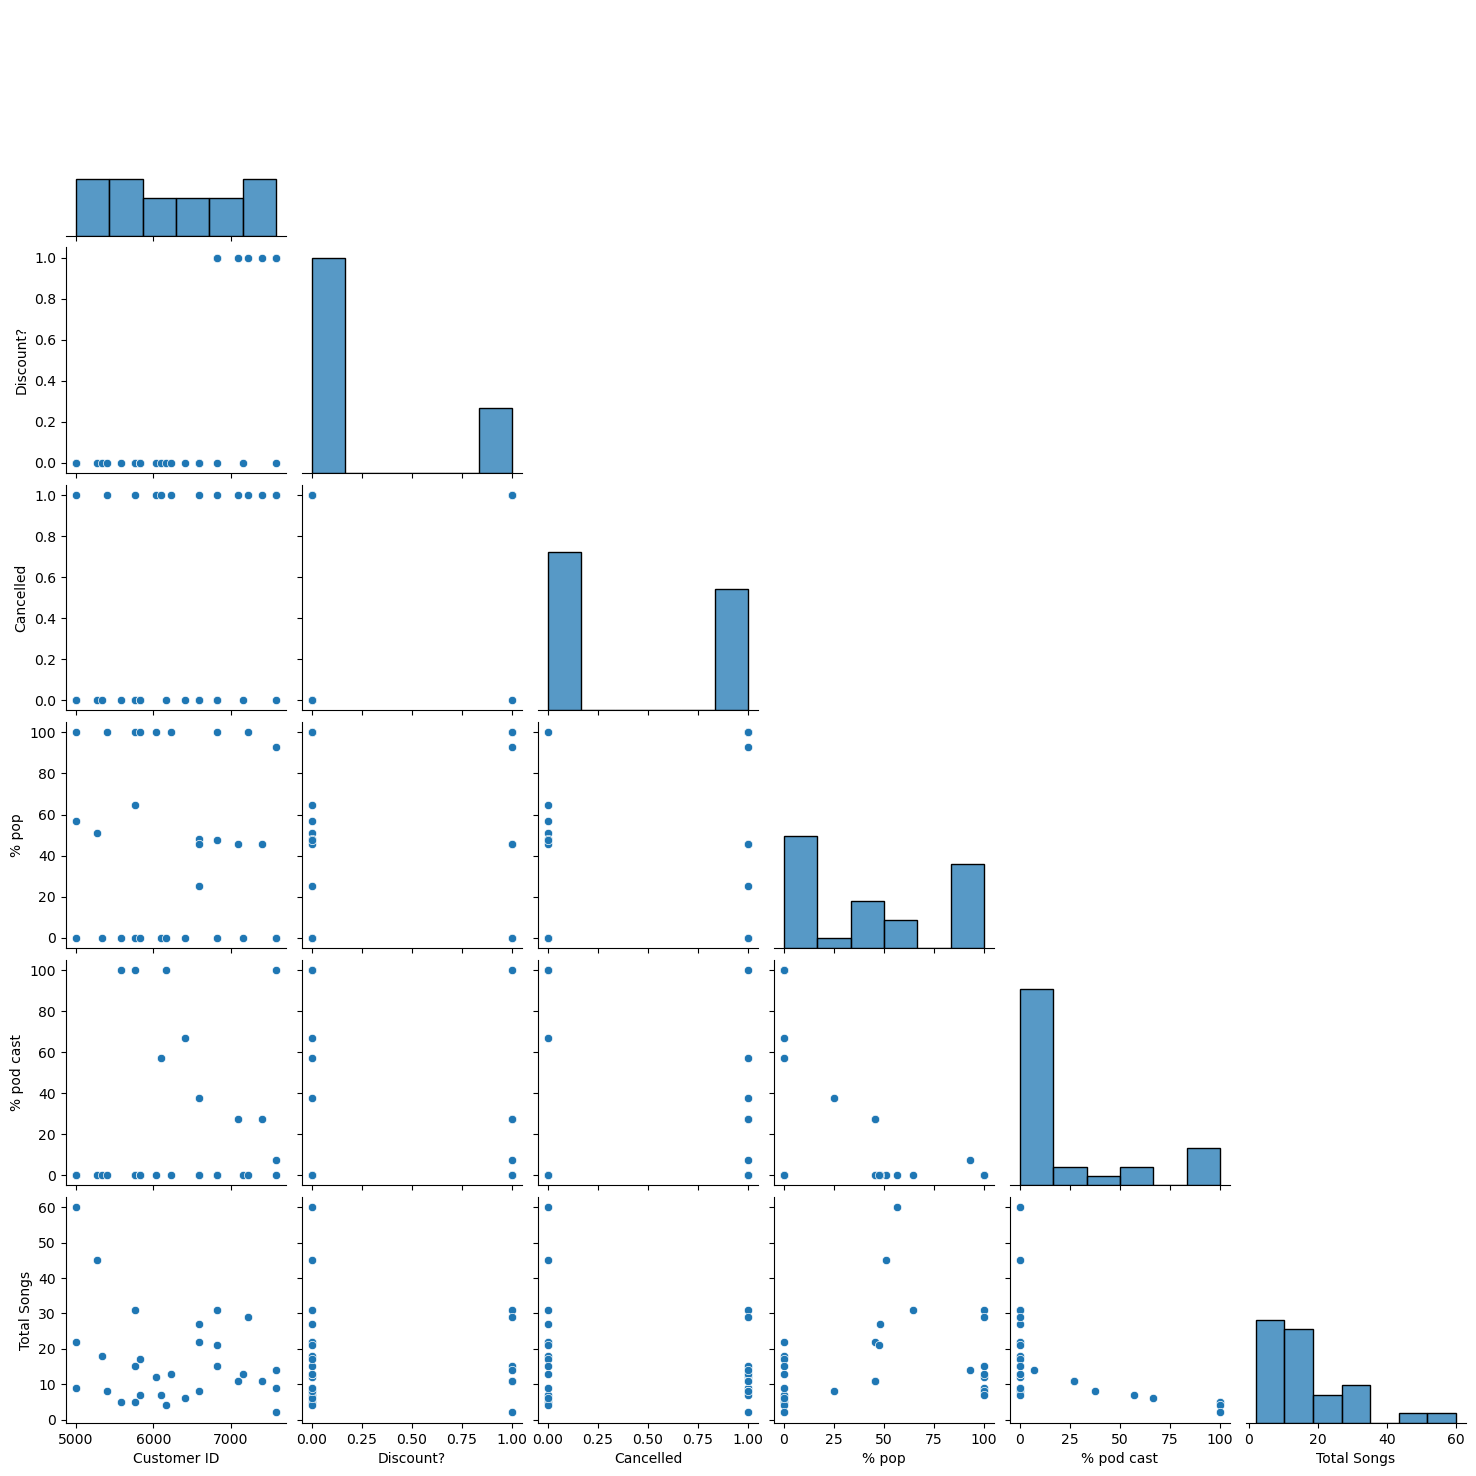

In [300]:
import seaborn as sns
sns.pairplot(model_df,corner=True);

In [301]:
model_df.corr()

,Customer ID,Discount?,Cancelled,% pop,% pod cast,Total Songs
Customer ID,1.000000,0.648514,0.269942,-0.076508,0.082395,-0.275152
Discount?,0.648514,1.000000,0.471825,0.142778,0.036279,-0.018543
Cancelled,0.269942,0.471825,1.000000,0.543898,-0.025866,-0.242031
% pop,-0.076508,0.142778,0.543898,1.000000,-0.529252,0.254273
% pod cast,0.082395,0.036279,-0.025866,-0.529252,1.000000,-0.516023
Total Songs,-0.275152,-0.018543,-0.242031,0.254273,-0.516023,1.000000


In [ ]:
# Observations
## A discount is correlated with a cancellation
## The more listening songs, the fewer cancellations
## The more pop music, the more cancellations
## Podcast listening history seems unrelated to cancellations